In this section, we will discuss what is perhaps the most broadly used methodology in modern biological analysis, matrix decomposition. One form of matrix decomposition the most commonly referenced method is principal component analysis (PCA). We will explore the many uses of matrix decomposition later in this section and for now, focus on dimensionality reduction. 
 

# Introduction

The basic idea of PCA is to rotate and stretch a lower-dimensional projection of our data so that we can best understand the data. As an analogy, take what looks like a nonsensical jumbled ball (from a molecular model set) in three dimensions. 
 
![title](images/general-unsupervised-learning/The-Vitruvian-Man-403x600.jpg)

 
However, if we shine a light in just the right place we get a projection of that same object in two dimensions that reveals a familiar pattern.

![title](images/general-unsupervised-learning/the-vitruvian-man-shadow-art-teodosio-sectio-aurea-2013-5acff82a.jpg)


This wonderful art by the artist [Teodosio Sectio Aurea](https://teodosio.gr/) demonstrates the goal of PCA and dimensionality reduction nicely. Except now with PCA instead of going from 3D to 2D we will go from a very large number of dimensions to 3 or 2 dimensions.


In order to explore how PCA works we will borrow from (Python Data Science Handbook by Jake VanderPlas)[https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html] which is an excellent resource for exploring these topics further. 

PCA can be performed through several different methods. First, we will discuss PCA through eigendecomposition on the covariance matrix. To explore this we will first define a small toy example dataset.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

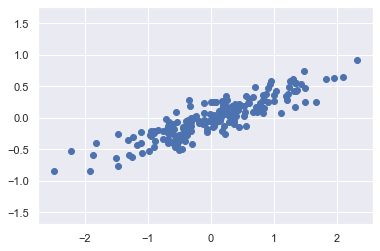

In [28]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

From this we can see there is probably a linear relationship between x and y. In PCA this relationship is quantified in the PC axis. 

In order to perform PCA we will operate on the covariance matrix $\Sigma$, which is a $d \times d$ matrix where each element represents the covariance between two features. This can be written more generally as:

$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \sum\limits_{i=1}^n x_{i}.$  
The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.


In [185]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[1.00502513 0.89385925]
 [0.89385925 1.00502513]]


In [186]:
# this can also be done
# with np.cov
np.cov(X_std.T)

array([[1.00502513, 0.89385925],
       [0.89385925, 1.00502513]])

Now we will perform eigenvalue decomposition on the covariance matrix. You will learn all about  eigenvalue decomposition in your first year stats class so we will only touch on it here. 

For any $n\times n$ square matrix ${\bf A}$, if there exist a vector ${\bf v}$ and a scalar $\lambda$ such that the following eigen equation holds:

$$
\mathbf{X} \mathbf{v}=\lambda \mathbf{v}
$$

then $\lambda$ and ${\bf v}$ are called the eigenvalue and eigenvector of matrix ${\bf X}$. You can conceptualize  $\lambda$ as the scaling factor like in the art above where we hold the light to cast the shadow and how far we hold that light from the sculpture. We can perform this operation quickly with numpy.





In [187]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals = eig_vals[::-1]
eig_vecs = eig_vecs[:, ::-1] * -1

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[1.89888438 0.11116588]


We can normalize the Eigenvalues to sum to 1 in order to get the "explained variance".

In [188]:
explained_variance_ = eig_vals * (1 / eig_vals.sum())
print('Explained Variance \n%s' % explained_variance_)

Explained Variance 
[0.94469498 0.05530502]


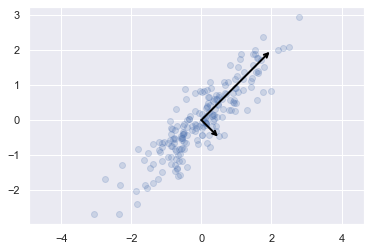

In [189]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color='black',
                    linewidth=2,
                    shrinkA=0,
                    shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
for length, vector in zip(eig_vals, eig_vecs):
    v = vector * 2 * np.sqrt(length)
    draw_vector(X_std.mean(axis=0),
                X_std.mean(axis=0) + v)
plt.axis('equal');

The vectors in the plot above represent the "principle axes" and the vector length of each arrow tells us how much variance or "how important" each vector is. In all cases we will rotate our origonal data in order of how much variance (how important each vector is). We can project this new data by doing the following:


In [190]:
X_pca = np.dot(X_std, eig_vecs)
X_pca.shape

(200, 2)

As you can now see there are two axes where the first is the PC1 axis that explained ~94% of the variance and the second is the PC2 axis that explains the other ~5%

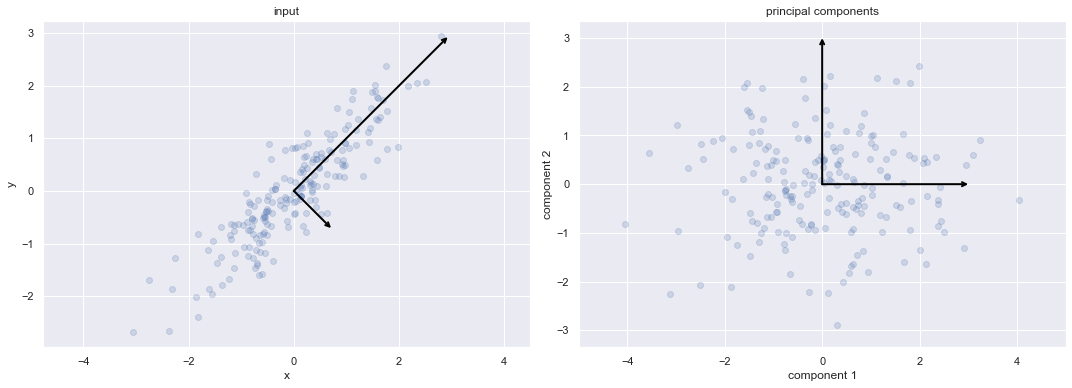

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
for length, vector in zip(eig_vals, eig_vecs):
    v = vector * 3 * np.sqrt(length)
    draw_vector(X_std.mean(axis=0), X_std.mean(axis=0)+ v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
ax[1].scatter(X_pca[:, 0], X_pca[:, 1] *3, alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-1, 1))

plt.show()

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

Before we transition to real biological data we will first explore singular value decomposition (SVD). Any implementation of PCA will not use eigenvalue decomposition is will use SVD. In fact, if you need to know only one method it is probably SVD - as it underpins almost all biological applications of unsupervised learning. 


There is a fantastic thread on SVD [here](https://threadreaderapp.com/thread/1285610321747611653.html) and we will borrow some from it. 


Now let's assume our matrix $X$ is not square and is instead $n \times p$. SVD will give 3 matrices $U$, $D$, $V$. Without loss of generality let’s assume that $n \geq p$. Then $U$ is an $n \times p$ matrix, and $D$ and $V$ have dimension $p \times p$. $U$, $D$, $V$ “decompose” the matrix $X$ because $X=UDV^T$.

PCA is a just a special case of SVD where the data is transformed such that the columns sum to zero and the data is centered (we did this earlier with "StandardScaler"). SVD is also the basis for all imputation of missing values, this is the basis for how Netflix suggests movies to you and Amazon products. In fact many of the methods you will encounter in bioinformatics are just altered SVDs (e.g. NMF ..etc).


![title](images/general-unsupervised-learning/svdmeme.jpg)

Now you want proof so let's repeat what we just did but with SVD - in one step. 



In [203]:
U, s, V = np.linalg.svd(X_std)
explained_variance_ = s * (1 / s.sum())

print('Explained Variance \n%s' % explained_variance_)
print('\nEigenvalues \n%s' %V)

Explained Variance 
[0.80518147 0.19481853]

Eigenvalues 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


[Text(0, 0.5, 'component 2'),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

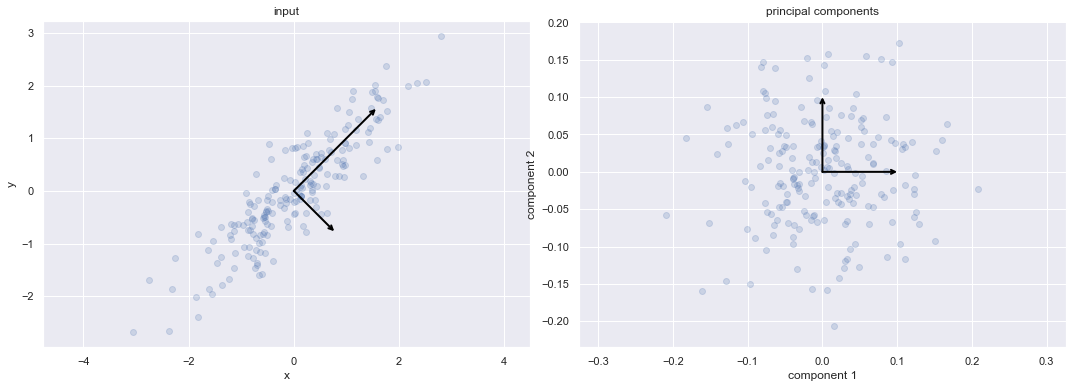

In [204]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
for length, vector in zip(s, V):
    v = vector * .5 * np.sqrt(length)
    draw_vector(X_std.mean(axis=0),
                X_std.mean(axis=0) + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
ax[1].scatter(U[:, 0], U[:, 1], alpha=0.2)
draw_vector([0, 0], [0, .1], ax=ax[1])
draw_vector([0, 0], [.1, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components')

Amazing! It is just all SVD. If you want to explore SVD further there are amazing resources available all over the internet (find which one works best for you but Susan Holmes textbook [here](http://web.stanford.edu/class/bios221/book/) is a good place to start). 

# Biological count data


As we saw in the "count-data-intro" section transformations and normalization are very important for biological data and dimensionality reduction is no exception. Here we will apply what we just learned above but to explore biological data.

We explore a human microbiome dataset where residual skin bacteria left on computer keyboards were analyzed for forensic identification of the person that left them. This can be done because each person has a completely unique microbiome on their skin. When you touch something you leave the microbes behind. The hope with this study is that by sequencing these microbes the person could be later identified (like what is done with human DNA). In the dataset found [here](https://qiita.ucsd.edu/study/description/232), we have three people and we explore if we can match them to their keyboard samples taken two weeks after they touched the keys. 


First we will import the data.


In [223]:
import pandas as pd
from biom import Table, load_table

In [259]:
# import sample metadata
mf = pd.read_csv('data/general-unsupervised-learning/232_20170409-171325.txt',
                 sep='\t', index_col=0)
# keep only the three subjects (for example)
mf = mf[mf.host_subject_id.isin(['M2','M3','M9'])]
mf['body_habitat'] = mf.body_habitat.replace({'Not applicable':'keyboard',
                                              'UBERON:skin':'human skin'})
# import table and filter
bt = load_table('data/general-unsupervised-learning/46811_otu_table.biom')
bt = bt.filter(mf.index)
bt = bt.filter(bt.ids('observation')[bt.sum('observation') > 10],
               'observation')
# convert to dataframe (for tutorial)
table = pd.DataFrame(bt.matrix_data.toarray(),
                     bt.ids('observation'), bt.ids())
table.head(5)


,232.M3Rinl217,232.M2Fkey217,232.M2Pkey217,232.M2Dkey217,232.M2Akey217,232.M2Bkey217,232.M2Ekey217,232.M2Enter217,232.M2Gkey217,232.M2Hkey217,...,232.M3Thml217,232.M2Ckey217,232.M2Zkey217,232.M2Midl217,232.M2Rinr217,232.M2Thml217,232.M2Wkey217,232.M3Xkey217,232.M3Ekey217,232.M3Kkey217
410908,0.0,7.0,7.0,0.0,1.0,3.0,1.0,26.0,8.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389067,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981783,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196271,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4465746,0.0,10.0,11.0,22.0,19.0,24.0,16.0,26.0,17.0,9.0,...,0.0,21.0,6.0,11.0,6.0,9.0,12.0,0.0,0.0,0.0


The *table* contains microbes in the rows and samples in the columns where entries are the number of sequences counted for the microbes in each sample. Additionally, the *mf* dataframe contains information for each sample in the *table* columns such as which subject the keys are known to be matched to. Now we will perform PCA exactly as we did before using SVD. 


In [292]:
from scipy.sparse.linalg import svds


X_std = StandardScaler().fit_transform(table.values)
U, s, V = svds(X_std, k=3)
explained_variance_ = s * (1 / s.sum())

print('Explained Variance \n%s' % explained_variance_[:4])

PCAdf = pd.DataFrame(V.T[:,::-1], table.columns, ['PC1','PC2','PC3'])
PCAdf.head(3)

Explained Variance 
[0.14967883 0.27715535 0.57316582]


,PC1,PC2,PC3
232.M3Rinl217,0.114413,0.043160,0.032370
232.M2Fkey217,0.092547,-0.121057,-0.074416
232.M2Pkey217,0.070466,-0.139169,-0.088413


Now that we have performed PCA by SVD we can visualize our data (using seaborn a very helpful package). We will color the samples by which person they came from ("host_subject_id") and the shape will be if it is from a keyboard or the persons skin ("body_habitat").


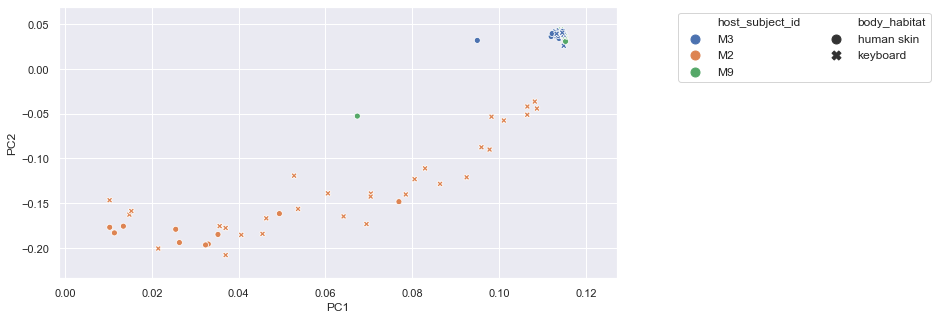

In [293]:
PCAdf_plot = pd.concat([PCAdf, mf], axis=1, sort=False)

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(x='PC1',y='PC2', hue='host_subject_id',
                style='body_habitat', data=PCAdf_plot, ax=ax)
# add a legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[:], labels[:],
                    prop={'size':12}, loc=2, 
                    bbox_to_anchor=(1.1, 1.0),
                    fancybox=True, framealpha=0.8,ncol=2
                    , markerscale=1.5, facecolor="white")

plt.show()

Wow this looks terrible! We have very large outliers and most of our dots are pushed to the corner of out plot. To overcome this let us try the geometric mean trick we used in the last section. To generalize that normalization we will define the the centered log ratio (CLR) transform. The CLR is just the same ratio of the geometric mean with a log to enforce symmetry (more on why log transforms are used in bio [here](http://web.stanford.edu/class/bios221/book/Chap-CountData.html)). This CLR can be written as:

$$
\operatorname{clr}(x)=\left[\log \frac{x_{1}}{g(x)}, \ldots, \log \frac{x_{D}}{g(x)}\right]=\log x-\overline{\log x}
$$

where $g(x)$ is the geometric mean of all of the microbes. 

This transformation also has the nice property of centering our data so that we can just use SVD after the transformation.





In [294]:
from skbio.stats.composition import clr


U, s, V = svds(clr(table + 1), k=3)
explained_variance_ = s * (1 / s.sum())

print('Explained Variance \n%s' % explained_variance_[:4])

PCAdf = pd.DataFrame(V.T[:,::-1][:,:2], table.columns, ['PC1','PC2'])
PCAdf.head(3)

Explained Variance 
[0.23789315 0.25636637 0.50574049]


,PC1,PC2
232.M3Rinl217,0.079711,-0.081546
232.M2Fkey217,-0.158617,-0.014393
232.M2Pkey217,-0.080204,0.015098


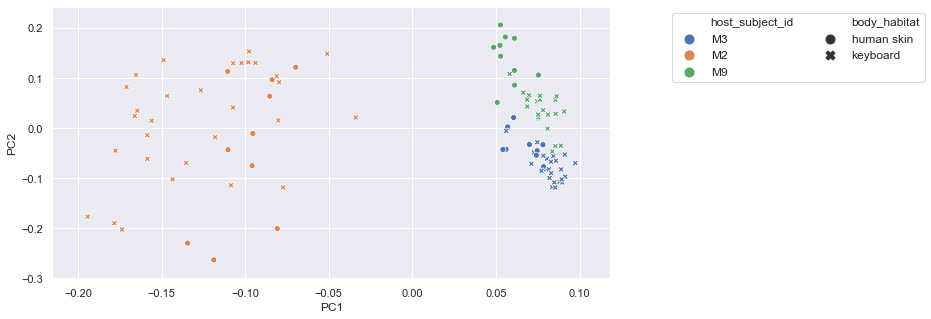

In [295]:
PCAdf_plot = pd.concat([PCAdf, mf], axis=1, sort=False)

fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(x='PC1',y='PC2', hue='host_subject_id',
                style='body_habitat', data=PCAdf_plot, ax=ax)
# add a legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[:], labels[:],
                    prop={'size':12}, loc=2, 
                    bbox_to_anchor=(1.1, 1.0),
                    fancybox=True, framealpha=0.8,ncol=2
                    , markerscale=1.5, facecolor="white")

plt.show()

This looks much better we can now resolve each host and see that their keyboards are more similar to the host that left the microbes than another host. This demonstrates that there may be a forensic application to these microbiomes. We will explore more in the next section on supervised learning of this dataset (to see if we can predict the person based on the microbiome). We will also look at further use of this dimensionality reduction in the next section. 
